# POPTICS
step1.CLEAN THE RAW DATA TO THE CORRECT INPUT FORMAT OF POPTICS
step2.USE POPTICS TO EACH USER AND GET THE CLUSTERS OF EACH USER

# step1.CLEAN THE RAW DATA TO THE CORRECT INPUT FORMAT OF POPTICS

In [2]:
print("Run our poptics")
import numpy as np
from collections import defaultdict
import source.optics as OP

# ------------------------open file--------------------------------#
nyc = open("nyc.txt", encoding='ISO-8859-1')
#------------------------------------------------------------------#

'''
the dictonary 'user_checkin_history' (defined below) contains inputs to POPTICS
Data format:
{
    user_1 : [(venue_category_1, lantitude_1, longtitude_1), (venue_category_2, lantitude_2, longtitude_2) ...],
    user_2 : [(venue_category_i, lantitude_i, longtitude_i), (venue_category_i+1, lantutide_i+1, longtitude_i+1) ...],
    user_3 : [...],
    ...    :  ... ,
    user_n : [...]
}
'''
user_checkin_history = defaultdict(list)



#---------------------extract data from file-----------------------------#
for line in nyc:
    # index 3 : venue category, 4 : Latitude, 5 : Longitude
    lst = line.split('\t')
    
    # lantitude and longtitude
    lantitude = float(lst[4])
    longtitude = float(lst[5])
    
    # venue category, combine categories into a single category
    category = lst[3]
    if 'Restaurant' in category:
        venue_category = 'Restaurant'
    elif 'Joint' in category:
        venue_category = 'Food Joint'
    elif 'Museum' in category:
        venue_category = 'Museum'
    else:
        venue_category = category
    
    # construct the checkin
    single_checkin = (venue_category, lantitude, longtitude)
    
    # add this checking location, lst[0] is the user's id
    user_checkin_history[lst[0]].append(single_checkin)
#----------------------------------------------------------------------#



#-------------------remove insignificant venues categories and users-----------#
# format : {venue_category_1 : count 1, venue_category_2 : count 2, ...}
venue_count = defaultdict(lambda : 0)
for user, checkins in user_checkin_history.items():
    for checkin in checkins:
        venue_count[checkin[0]] += 1

# delete all checkins whose venue categories have not been visited over 1200 times
for user, checkins in user_checkin_history.items():
    new_checkins = []
    for checkin in checkins:
        if venue_count[checkin[0]] >= 1200:
            new_checkins.append(OP.Point(checkin[1],checkin[2]))   #remove the category in checkin
    user_checkin_history[user] = new_checkins

# remove users who visited less than 100 places
remove = []
for user, checkins in user_checkin_history.items():
    if len(checkins) < 100:
        remove.append(user)
for r in remove:
    del user_checkin_history[r]
#----------------------------------------------------------------------------------#


#---------------------------Remaining users---------------------------#
users = []
for user in user_checkin_history.keys():
    users.append(user)
    print(user,":", len(user_checkin_history[user]))
#---------------------------------------------------------------------#
print(user_checkin_history["517"])
print(len(users))

Run our poptics
1016 : 238
693 : 106
514 : 132
837 : 176
1001 : 157
205 : 205
1028 : 114
276 : 160
662 : 289
819 : 551
89 : 123
763 : 254
54 : 105
646 : 314
516 : 136
542 : 105
259 : 134
995 : 158
288 : 245
12 : 290
260 : 132
881 : 540
158 : 103
506 : 146
624 : 184
757 : 127
129 : 188
951 : 644
434 : 103
1058 : 187
185 : 1677
152 : 134
805 : 141
916 : 197
1043 : 120
719 : 167
56 : 256
71 : 124
994 : 118
409 : 121
335 : 368
88 : 209
738 : 113
846 : 144
477 : 105
730 : 586
362 : 131
325 : 110
901 : 397
676 : 130
1062 : 128
386 : 209
305 : 122
984 : 103
311 : 207
1082 : 255
202 : 150
956 : 119
323 : 152
337 : 121
281 : 214
823 : 126
534 : 116
345 : 106
780 : 179
111 : 123
444 : 250
143 : 110
927 : 110
26 : 135
596 : 262
569 : 102
748 : 124
361 : 118
968 : 137
970 : 126
287 : 141
445 : 752
234 : 114
21 : 135
131 : 108
525 : 149
834 : 352
393 : 104
761 : 180
798 : 199
861 : 126
697 : 179
178 : 581
67 : 145
182 : 239
781 : 200
584 : 104
136 : 131
767 : 170
765 : 100
1070 : 198
388 : 117
755 

# step2.USE POPTICS TO EACH USER AND GET THE CLUSTERS OF EACH USER
#number of user : 782
#FOR EACH USER RUN POPTICS:
#input : locations of one user, yita
#output : clusters of user locations

In [26]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)


3.0.3


In [61]:
def POPTICS(points, yita):
    poptics = OP.Optics(points, 100, yita)
    poptics.run()
    clusters = poptics.cluster(yita)
    return clusters

# run POPTICS on every user(note that the user id '10' is a string):
# GL = defaultdict(list)
# for user in users:
#     GL[user].append(POPTICS(user_checkin_history[user], len(user_checkin_history[user])//20))
    


# The poptics result of user 185

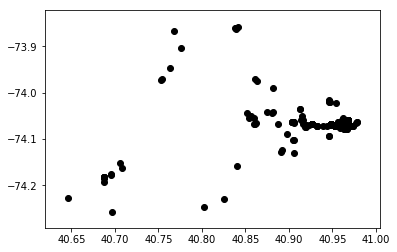

In [62]:
x = []
y = []
for point in user_checkin_history['185']:
    x.append(point.latitude)
    y.append(point.longitude)
plt.scatter(x, y, color='black')
plt.show()

In [64]:
GL = POPTICS(user_checkin_history['185'], len(user_checkin_history['185'])//20 )
for cluster in GL:
    print(cluster.points)

[(40.965417, -74.062920), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964), (40.965446, -74.062964),

0


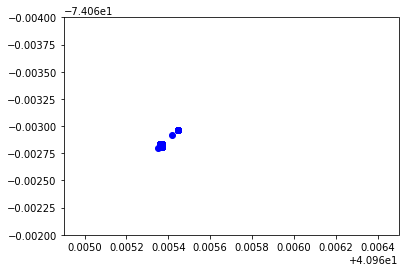

1


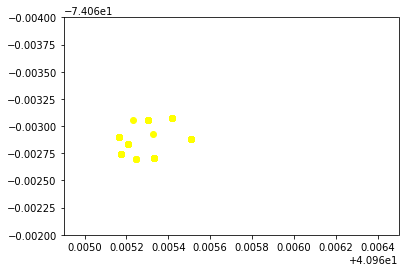

In [65]:

color = ["blue", "yellow", "green", "red"]
for i,cluster in enumerate(GL):
    x = []
    y = []
    for point in cluster.points:
        x.append(point.latitude)
        y.append(point.longitude)
    print(i)
    plt.scatter(x, y, color = color[i])
    plt.axis([40.9649, 40.9665, -74.062, -74.064])
    plt.show()